In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

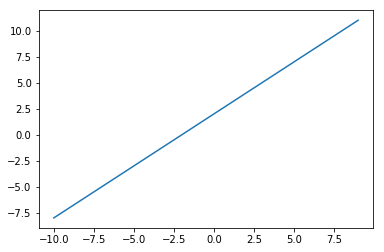

In [5]:
px = np.arange(-10, 10)
m, c = 1, 2
py = m * px + c
plt.plot(px, py)

In [8]:
noise = np.random.random(len(px))
pynoise = m * px + c + 10 * noise
plt.scatter(px, pynoise)

Epoch Cost :: 17.831765610724688
Epoch Cost :: 19.166817938350142
Epoch Cost :: 15.602589854970574
Epoch Cost :: 12.934177497960627
Epoch Cost :: 10.932095630473487
Epoch Cost :: 9.426297673862427
Epoch Cost :: 8.290676261857152
Epoch Cost :: 7.431623850017786
Epoch Cost :: 6.77960079908371
Epoch Cost :: 6.282881276309491
Epoch Cost :: 5.902946350723505
Epoch Cost :: 5.6110658895224335
Epoch Cost :: 5.385781879129354
Epoch Cost :: 5.211029131052783
Epoch Cost :: 5.074761121254414
Epoch Cost :: 4.967921983264387
Epoch Cost :: 4.883681168699695
Epoch Cost :: 4.816878249915317
Epoch Cost :: 4.763595358119346
Epoch Cost :: 4.7208520095809945
Epoch Cost :: 4.686367331794463
Epoch Cost :: 4.658392641670071
Epoch Cost :: 4.635577493114397
Epoch Cost :: 4.616876375582069
Epoch Cost :: 4.6014736673794685
Epoch Cost :: 4.588732518441975
Epoch Cost :: 4.578146904800088
Epoch Cost :: 4.569320071209222
Epoch Cost :: 4.5619353338959625
Epoch Cost :: 4.555734822142403
Epoch Cost :: 4.5505170773001735

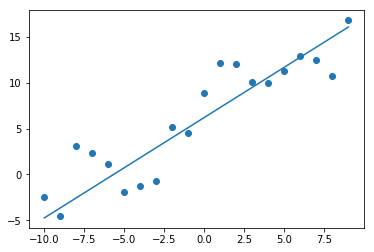

In [39]:
# these are placeholder for training instances
x = tf.placeholder(dtype=tf.float32, name='x')
y = tf.placeholder(dtype=tf.float32, name='y')

# these are to be updated by some magic function
w = tf.Variable(dtype=tf.float32, initial_value=np.random.random()*0.01)
b = tf.Variable(dtype=tf.float32, initial_value=0)

# prediction = x * w + b
output = tf.add(tf.multiply(x, w), b)

# calculate some error shit
cost = tf.reduce_sum( 0.5 * (y-output) ** 2 )

# optmize this cost
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        epoch_cost = 0
        for xtrain, ytrain in zip(px, pynoise):
        #for j in range(len(pynoise)):
            #optimizer.eval({x : px[j], y : pynoise[j]})
            
            opt, c = sess.run(
                [optimizer, cost], 
                     feed_dict = {
                         x : xtrain,
                         y : ytrain
                     }
                    )
            
            #opt = optimizer.run({x : px[j], y : pynoise[j]})
            #c = cost.eval({x : px[j], y : pynoise[j]})
            epoch_cost += c
        
        print("Epoch Cost :: {}".format(epoch_cost / len(pynoise)))
    
    print(w.eval())
    print(b.eval())
    yfit = w.eval() * px + b.eval()
    plt.scatter(px, pynoise)
    plt.plot(px, yfit)
        
    